In [1]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [2]:
import scipy.special
import scipy.spatial.distance

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [12]:
f = open("../checkpoints/s151/20210521-1417/RewardDistributionEval/best-results.pickle", "rb")
best_results = pickle.load(f)
f.close()

In [13]:
best_results.keys()

dict_keys(['target_reward_hist', 'best_fitting_reward_hist', 'best_jds', 'best_reward_scale', 'labels', 'all_jsds', 'all_jsds_rscales', 'reward_hist_for_scale_1', 'all_rewards'])

<BarContainer object of 20 artists>

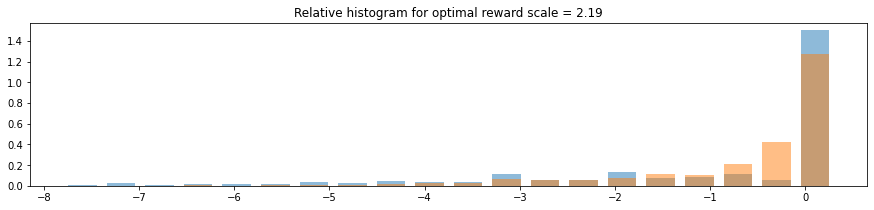

In [14]:
plt.figure(figsize=(15,3))
plt.title(f"Relative histogram for optimal reward scale = {best_results['best_reward_scale']}")
plt.bar(best_results['labels'][1:], best_results['target_reward_hist'], alpha=0.5, width=0.3)
plt.bar(best_results['labels'][1:], best_results['best_fitting_reward_hist'], alpha=0.5, width=0.3)

<BarContainer object of 20 artists>

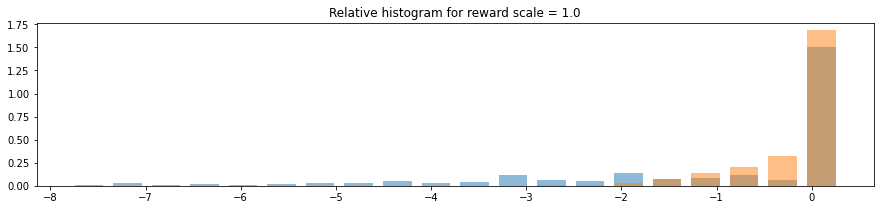

In [15]:
plt.figure(figsize=(15,3))
plt.title("Relative histogram for reward scale = 1.0")
plt.bar(best_results['labels'][1:], best_results['target_reward_hist'], alpha=0.5, width=0.3)
plt.bar(best_results['labels'][1:], best_results['reward_hist_for_scale_1'][0], alpha=0.5, width=0.3)

Text(0.5, 0, 'Reward Scale')

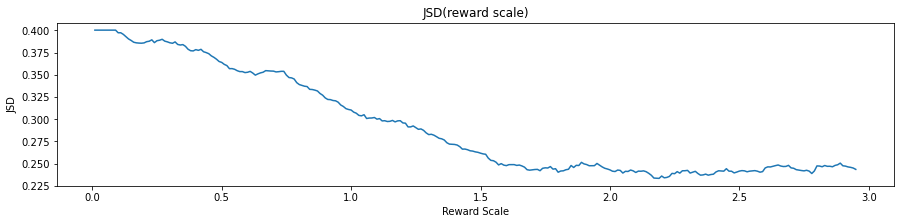

In [17]:
plt.figure(figsize=(15,3))
plt.title("JSD(reward scale)")
plt.plot(best_results['all_jsds_rscales'], best_results['all_jsds'])
plt.ylabel("JSD")
plt.xlabel("Reward Scale")